# Skoda used car analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

Dataset: car usage dataset that consists of records of used Skoda cars that include specific features such as:

1. **model**: the name of each model owned by Skoda cars

2. **year**: the year when the car was used

3. **price**: the price of each car

4. **transmission**: the type of transmission of each car; whether it is manual, semi-auto, automatic or other

5. **mileage**: the number of miles travelled or covered

6. **fuelType**: the type of fuel of each car; whether it is run by petrol, diesel, hybrid or other

7. **mpg**: the number of miles travelled or covered per gallon

8. **engineSize**: the size of engine


In [49]:
# dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

df = pd.read_csv("skoda.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0


In [50]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


## Counting unique value for each categorical column

### Unique value count for "model" column

In [16]:
model_count = df['model'].value_counts()
display(model_count)

 Fabia           1571
 Octavia         1477
 Superb           791
 Kodiaq           472
 Citigo           470
 Yeti Outdoor     458
 Karoq            390
 Scala            192
 Rapid            152
 Kamiq            141
 Yeti             136
 Roomster          17
Name: model, dtype: int64

### Unique value count for "year" column

In [52]:
year_count = df['year'].value_counts()
display(year_count)

2019    2114
2017    1539
2018     874
2016     840
2015     285
2020     276
2014     183
2013      93
2012      17
2011      14
2010      10
2009       6
2008       6
2007       4
2006       3
2005       2
2004       1
Name: year, dtype: int64

### Unique value count for "transmission" column

In [18]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Manual       3754
Semi-Auto    1408
Automatic    1104
Other           1
Name: transmission, dtype: int64

### Unique value count for "fuelType" column

In [54]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Petrol    4171
Diesel    2069
Hybrid      18
Other        9
Name: fuelType, dtype: int64

##  Creating a function to find the number of observations for unique value in a column of a DataFrame

In [20]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [21]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

## Creating a function to show the number of observations for each unique value in a column using a barplot

In [22]:
def barplot(data, column_x, color, rotation, yticks):
    
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    plt.title("Number of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    
    plt.yticks(yticks)

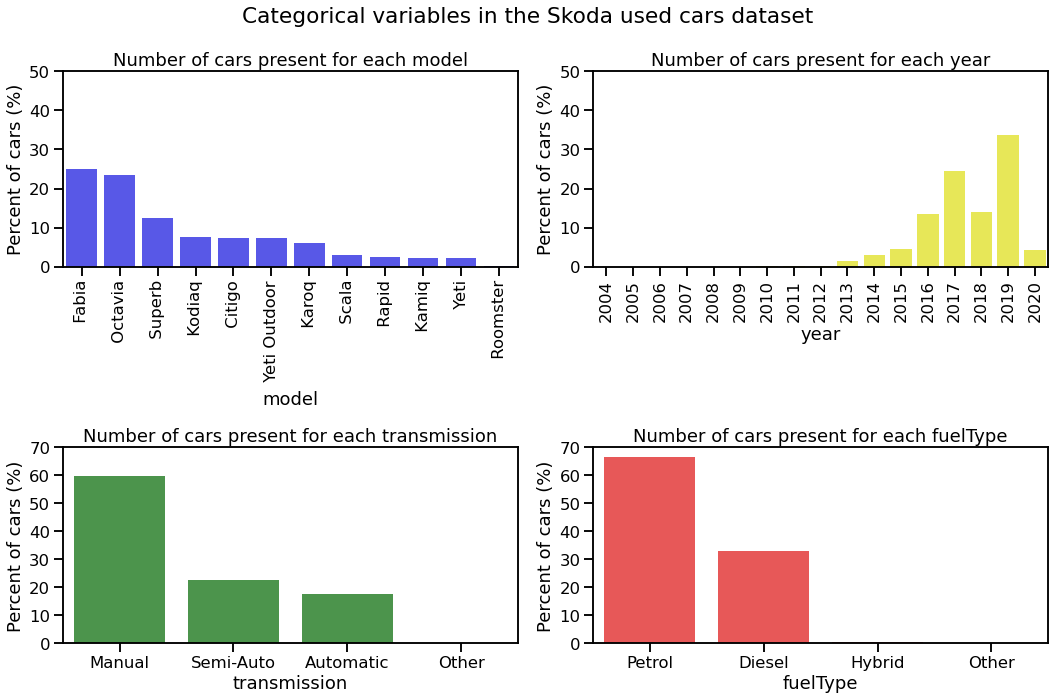

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

plt.subplot(2,2,2)
barplot(year_count, 'year', 'yellow', 90, np.arange(0,51,10))

plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

plt.suptitle("Categorical variables in the Skoda used cars dataset")

plt.tight_layout()

plt.show()

## Creating Scatterplot for each numerical column

### Scatterplot for "mileage" vs "price"

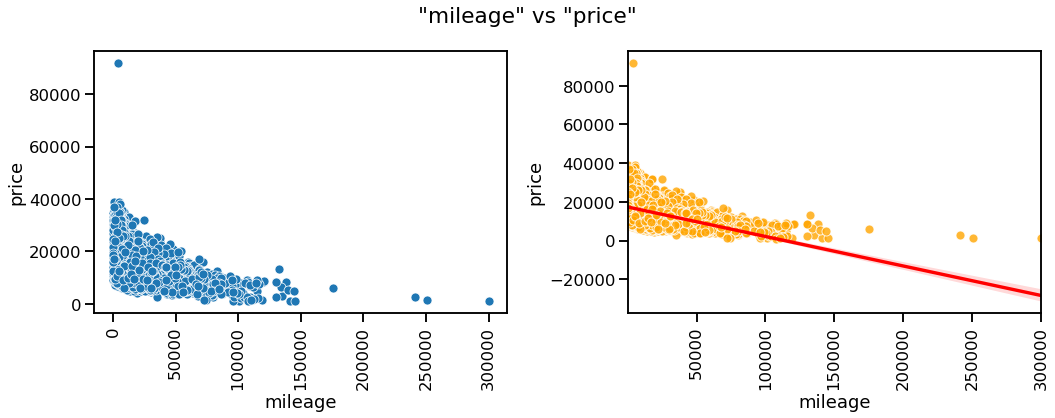

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.xticks(rotation=90)

# Adding a trend line
plt.subplot(2,2,2)
sns.regplot(x='mileage', y='price', data=df, 
            scatter_kws={'color':'orange', 'edgecolor':'white'},
            line_kws={'color':'red'})
plt.xticks(rotation=90)


plt.suptitle('"mileage" vs "price"')
plt.tight_layout()
plt.show()

### Scatterplot for "mpg" vs "price"

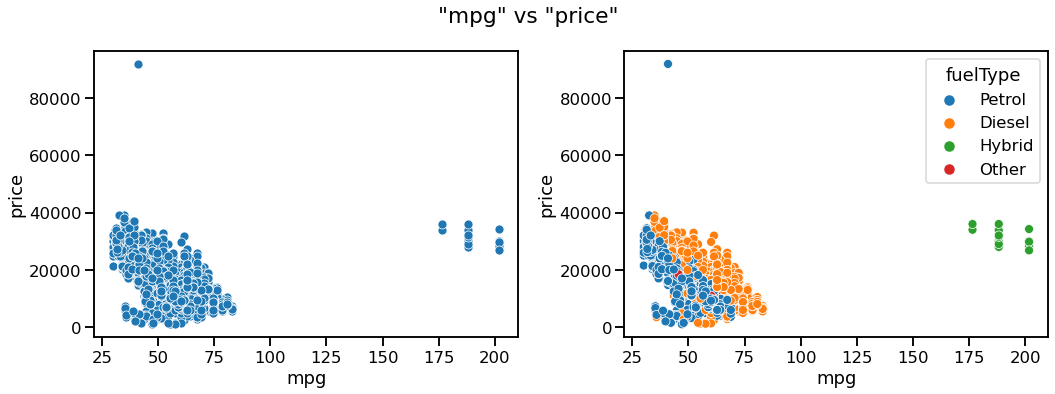

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='mpg', y='price', data=df)

# Adding "fuelType" column as hue
plt.subplot(2,2,2)
sns.scatterplot(x='mpg', y='price', data=df, hue="fuelType")

plt.suptitle('"mpg" vs "price"')
plt.tight_layout()
plt.show()

### Scatterplot for "engineSize" vs "price"

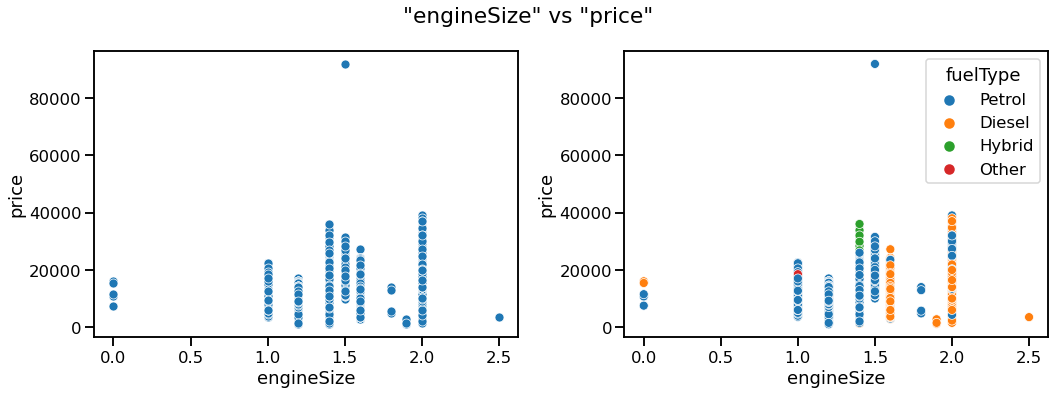

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='engineSize', y='price', data=df)

# Adding "fuelType" column as hue
plt.subplot(2,2,2)
sns.scatterplot(x='engineSize', y='price', data=df, hue="fuelType")

plt.suptitle('"engineSize" vs "price"')
plt.tight_layout()
plt.show()

## Creating Histogram for each numerical column

### Histogram for "price" column

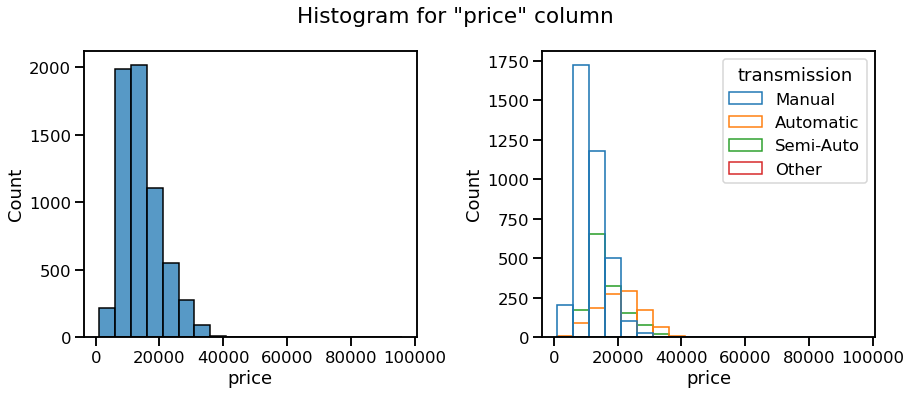

In [37]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='price', binwidth= 5000)

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='price', binwidth= 5000, hue= "transmission",fill=False)

plt.suptitle('Histogram for "price" column')
plt.tight_layout()
plt.show()

### Histogram for "mileage" column

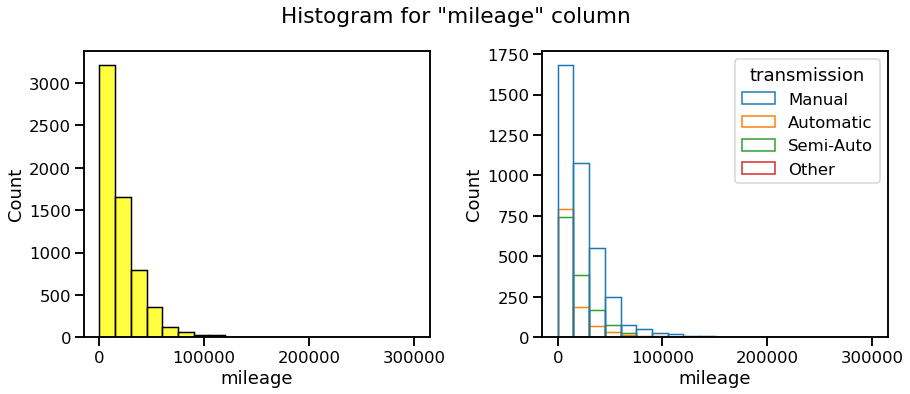

In [38]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='mileage', binwidth= 15000, color= "yellow")

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='mileage', binwidth= 15000, hue= "transmission", fill=False)

plt.suptitle('Histogram for "mileage" column')
plt.tight_layout()
plt.show()

### Histogram for "mpg" column

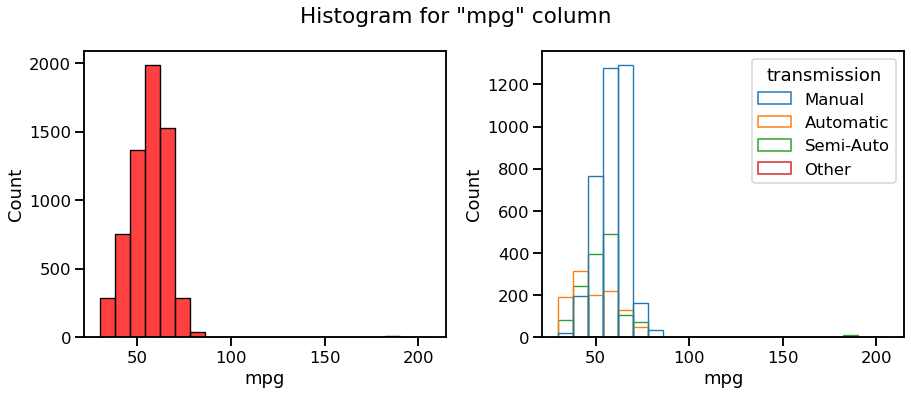

In [39]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='mpg', binwidth= 8, color= "red")

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='mpg', binwidth= 8, hue= "transmission", fill=False)

plt.suptitle('Histogram for "mpg" column')
plt.tight_layout()
plt.show()

### Histogram for "engineSize" column

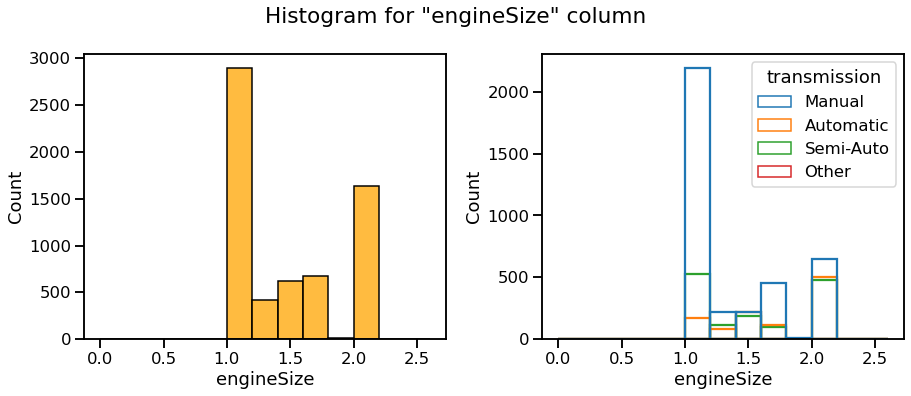

In [40]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.2, color= "orange")

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='engineSize', binwidth= 0.2, hue= "transmission", fill=False)

plt.suptitle('Histogram for "engineSize" column')
plt.tight_layout()
plt.show()

## Creating Distribution plot for each numerical column

### Distribution plot for "price" column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


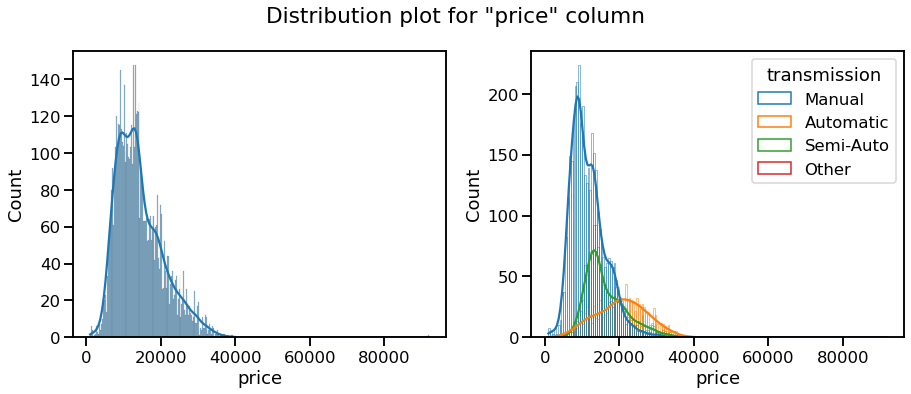

In [41]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='price', binwidth= 250, kde = True)

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='price', binwidth= 500, kde = True, hue= "transmission", fill= False)

plt.suptitle('Distribution plot for "price" column')
plt.tight_layout()
plt.show()

### Distribution plot for "mileage" column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


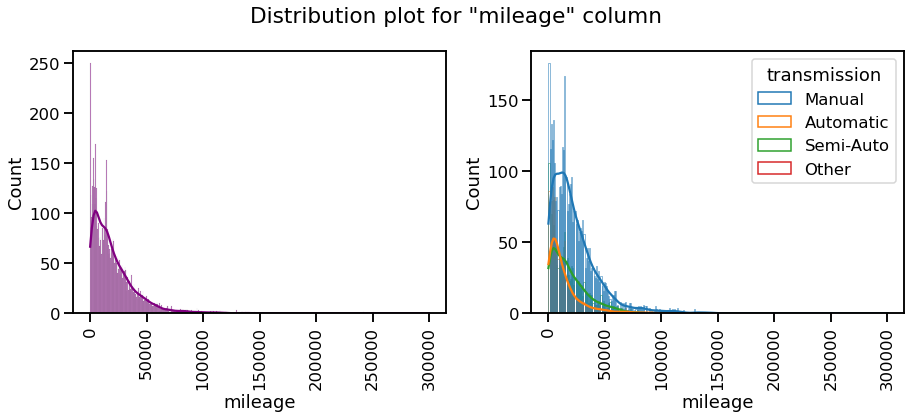

In [42]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='mileage', binwidth= 500, color= "purple", kde = True)
plt.xticks(rotation=90)

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='mileage', binwidth= 1000, hue= "transmission", kde= True, fill=False)
plt.xticks(rotation=90)

plt.suptitle('Distribution plot for "mileage" column')
plt.tight_layout()
plt.show()

### Distribution plot for "mpg" column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


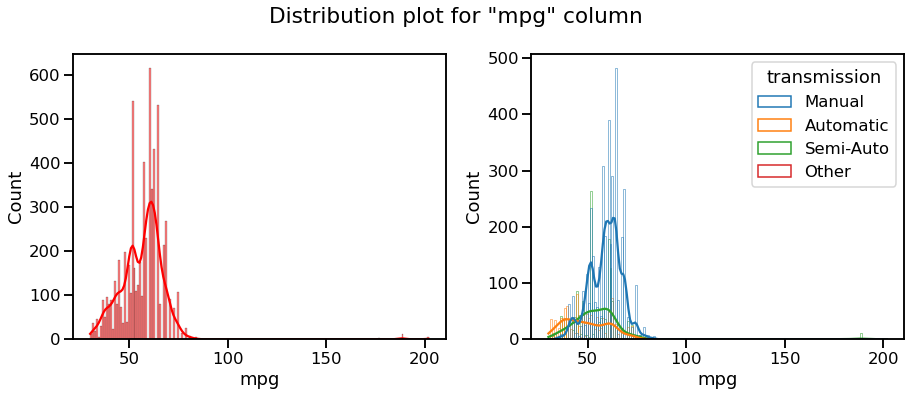

In [43]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='mpg', binwidth= 1, color= "red", kde= True)

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='mpg', binwidth= 1, hue= "transmission", kde= True, fill=False)

plt.suptitle('Distribution plot for "mpg" column')
plt.tight_layout()
plt.show()

### Distribution plot for "engineSize" column

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


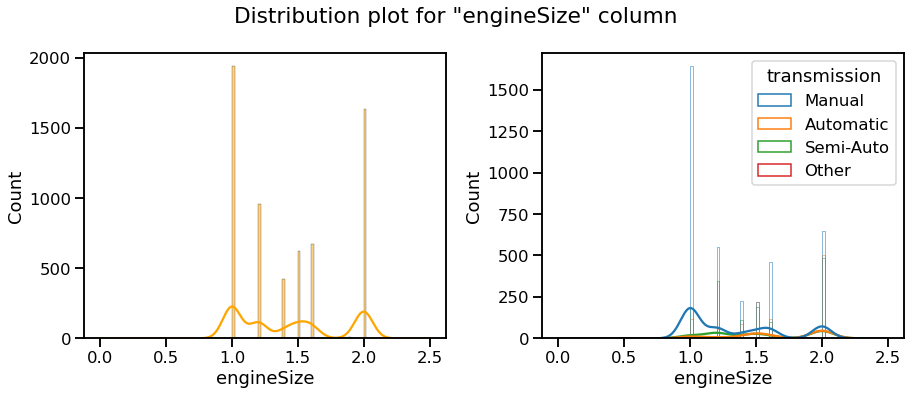

In [55]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.02, kde= True, color= "orange")

# Adding "transmission" column as hue
plt.subplot(2,2,2)
sns.histplot(data=df, x='engineSize', binwidth= 0.02, hue= "transmission", kde= True, fill=False)

plt.suptitle('Distribution plot for "engineSize" column')
plt.tight_layout()
plt.show()

## Creating ECDF plot for each numerical column

### ECDF plot for "price" column

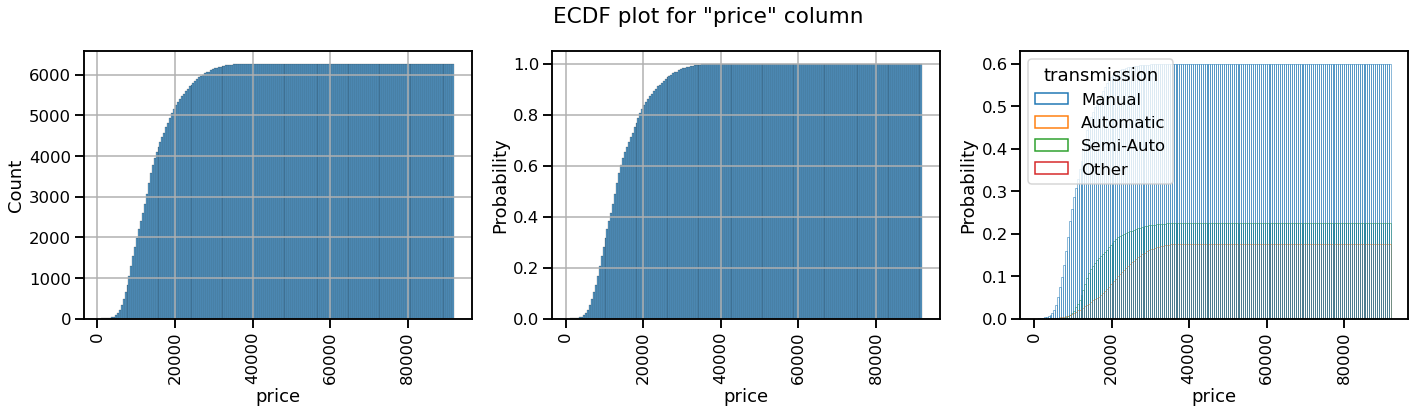

In [45]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='price', binwidth= 500, cumulative=True)
plt.xticks( rotation=90)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(data=df, x='price', binwidth=500, cumulative=True, stat='probability')
plt.xticks( rotation=90)
plt.grid()

# Adding "transmission" column as hue
plt.subplot(2,3,3)
sns.histplot(data=df, x='price', binwidth=500, cumulative=True, stat='probability', hue='transmission', fill= False)
plt.xticks( rotation=90)


plt.suptitle('ECDF plot for "price" column')
plt.tight_layout()
plt.show()

### ECDF plot for "mileage" column

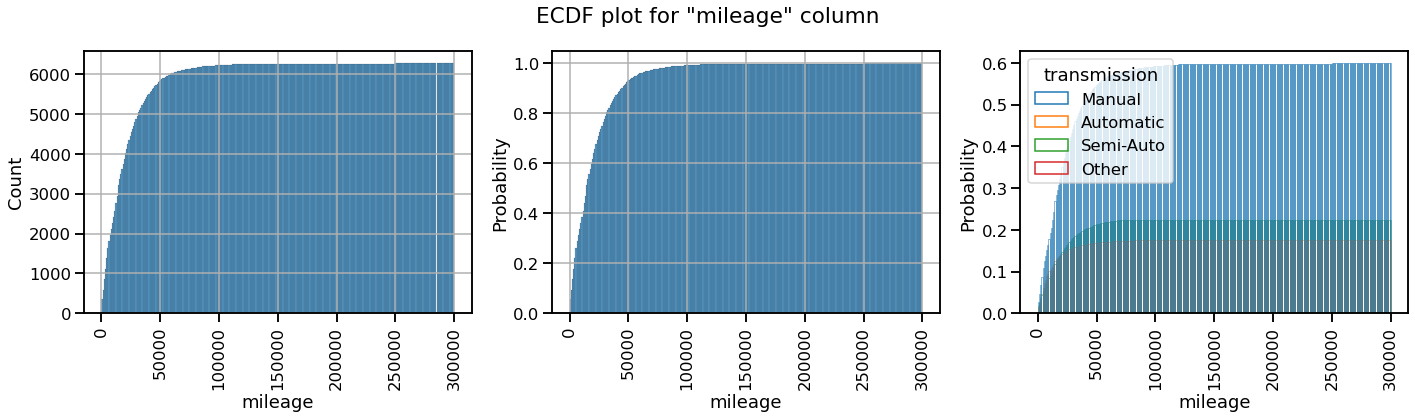

In [46]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='mileage', binwidth= 1000, cumulative=True)
plt.xticks( rotation=90)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(data=df, x='mileage', binwidth=1000, cumulative=True, stat='probability')
plt.xticks( rotation=90)
plt.grid()

# Adding "transmission" column as hue
plt.subplot(2,3,3)
sns.histplot(data=df, x='mileage', binwidth=1000, cumulative=True, stat='probability', hue='transmission', fill= False)
plt.xticks( rotation=90)


plt.suptitle('ECDF plot for "mileage" column')
plt.tight_layout()
plt.show()

### ECDF plot for "mpg" column

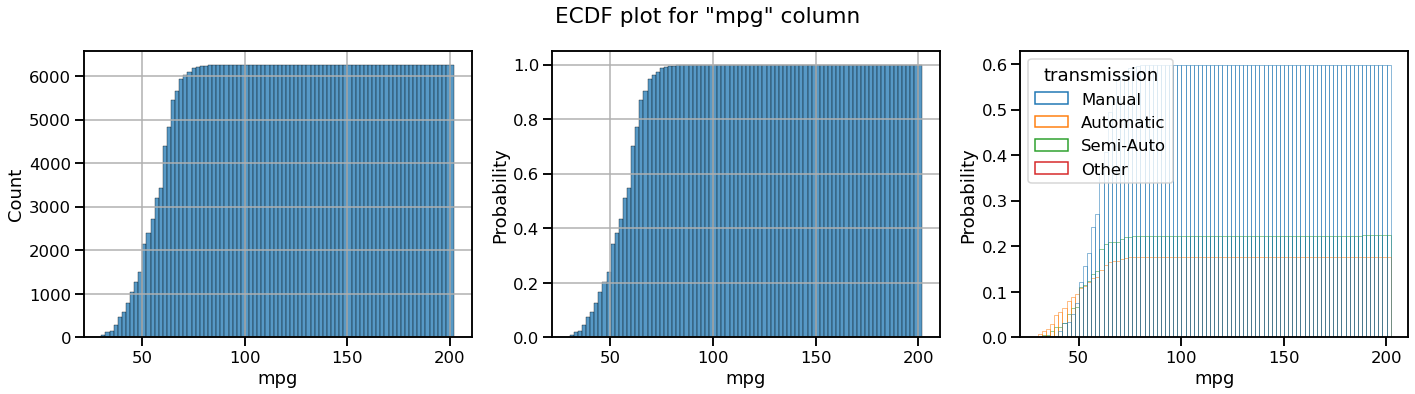

In [47]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='mpg', binwidth= 2, cumulative=True)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(data=df, x='mpg', binwidth=2, cumulative=True, stat='probability')
plt.grid()

# Adding "transmission" column as hue
plt.subplot(2,3,3)
sns.histplot(data=df, x='mpg', binwidth=2, cumulative=True, stat='probability', hue='transmission', fill= False)


plt.suptitle('ECDF plot for "mpg" column')
plt.tight_layout()
plt.show()

### ECDF plot for "engineSize" column

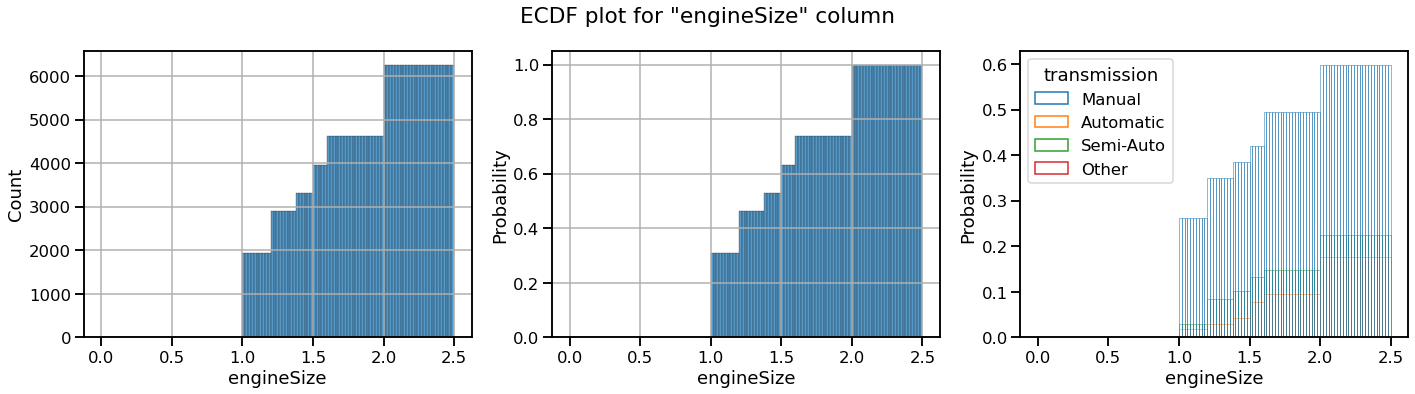

In [48]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.02, cumulative=True)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(data=df, x='engineSize', binwidth=0.02, cumulative=True, stat='probability')
plt.grid()

# Adding "transmission" column as hue
plt.subplot(2,3,3)
sns.histplot(data=df, x='engineSize', binwidth=0.02, cumulative=True, stat='probability', hue='transmission', fill= False)


plt.suptitle('ECDF plot for "engineSize" column')
plt.tight_layout()
plt.show()